In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import seaborn as sns
import tensorflow as tf

In [4]:
from environment import TradingEnvironment
from market_instance import new_market, make_investors

### Configuration for the synthetic market

In [5]:
config = {
    'num_investors': 10,
    'num_rounds_per_day': 3
}

### Our own portfolio

In [6]:
holdings = {
    'cash': 100000.00, 
    'TSLA': 300, 
    'AAPL': 200, 
    'MSFT': 400}

### Create the RL Environment

In [7]:
market = new_market()
environment = TradingEnvironment(config, holdings, market, 0.002)

## The market in action

In [8]:
for _ in range(360):
    market.open()
    daily = environment.let_others_trade()
    market.close()

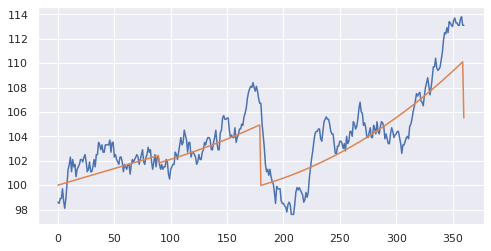

In [9]:
def plot(ticker):
    sns.set(rc={'figure.figsize':(8.0,4.0)})
    h = market.history_for(ticker)
    s = market.stocks[ticker]
    p_open, p_close, p_high, p_low = np.transpose(h)
    t = np.array(range(len(p_open)))
    sns.lineplot(t, p_open);
    sns.lineplot(t, [s.psi(tt) for tt in t]);
plot('AAPL')

## Perform an Action = Re-Balance

In [10]:
target_weights = np.array([.1, .3, .4, .2])

In [11]:
investor = environment.investor
print(investor, environment.total_wealth())
environment.act(target_weights)
print(investor, environment.total_wealth())

WB (cash: 100000.0, {'TSLA': 300, 'AAPL': 200, 'MSFT': 400}) 252861.7
WB (cash: 50545.473, {'TSLA': 699, 'AAPL': 224, 'MSFT': 349}) 252747.689


In [12]:
# slightly off-target because of integer stock counts and the trading costs.
environment.normalized_holdings()

array([0.09890566, 0.29865698, 0.40245345, 0.19998392])